
    1.Название работы: Ряд Фурье. Преобразование Фурье. Корреляция.

    2.Цель: Получить представление о спектрах телекоммуникационных сигналов.
    
    3.Постановка задачи:
        – Для сигналов, построенных в лабораторной работе No1, вы-
            полните расчет преобразования Фурье. Перечислите свойства
            преобразования Фурье.
        – С помощью функции корреляции найдите позицию синхро-
            посылки [101] в сигнале [0001010111000010]. Получите пакет
            данных, если известно, что его длина составляет 8 бит без
            учета синхропосылки. Вычислите корреляцию прямым мето-
            дом, воспользуйтесь алгоритмом быстрой корреляции, сравни-
            те время работы обоих алгоритмов.

    4.Теоритический раздел
        Свойства ряда Фурье:
            -Ряд Фурье — представление функции f с периодом τ ∞
        f(x)=a0 +􏰃Akcos􏰁2kπx−αk􏰂(1) 2τ
        k=1
            -Дискретное преобразование Фурье является линейным преобразованием. Переводит в

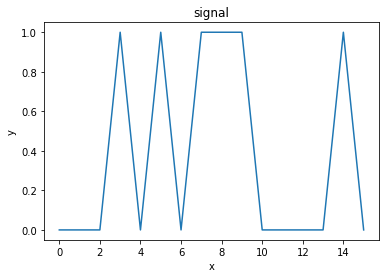

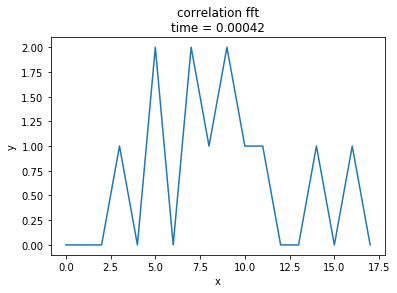

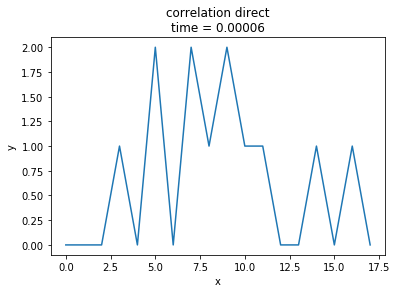

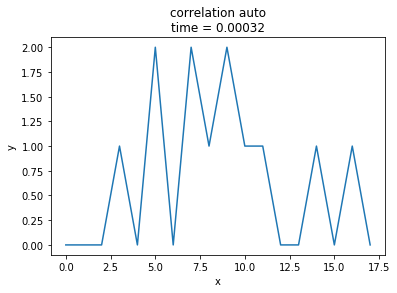

sync_mess       = sig[6 : 14] =   [1 0 1]
package start   =  6
package         =  [0 1 1 1 0 0 0 0]


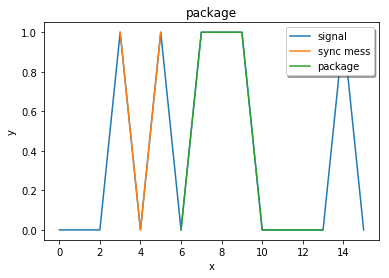


    6.Выводы:
        С помощью функции корреляции была найдена позиция синхропосылки в сигнале, был получен пакет данных. Корреляция была вычислена прямым методом, и методом быстрой корреляции.
    


In [2]:
from __future__ import print_function
import sys
sys.path.append("../..") 
from Telecom.my_telecom import *
from timeit import default_timer as timer

print(lab2_theory.__doc__)

show = True

sig = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])
sync_mess = np.array([1, 0, 1])
p_size = 8

plot_graphic(x=np.arange(0, sig.__len__(), 1), y=sig,
             title='signal', show=True)

# sig_noise = sig + np.random.randn(len(sig))

for method in ['fft', 'direct', 'auto']:
    t = timer()
    corr = signal.correlate(sig, sync_mess, mode='full', method=method)
    elapsed = timer() - t
    plot_graphic(x=np.arange(0, corr.__len__(), 1), y=corr,
                 title='correlation %s\ntime = %.5f' % (method, elapsed),
                 show=True)

sy_mess_end = 0
max_corr = 0
i = 0
for n in corr:
    if n > max_corr:
        max_corr = n
        sy_mess_end = i
    i += 1

p_start = sy_mess_end+1
p_end = p_start + p_size
p = sig[p_start:p_end]

print("sync_mess       = sig[%.d : %.d] =  " % (p_start,p_start+p_size),
      sig[p_start-sync_mess.__len__():p_start])
print("package start   = ", p_start)
print("package         = ", p)

plot_graphic(x=np.arange(0, sig.__len__(), 1), y=sig)
plot_graphic(x=np.arange(p_start-3, p_start, 1), y=sync_mess)
plot_graphic(x=np.arange(p_start, p_end, 1), y=p,
             title='package')
plt.legend(('signal', 'sync mess','package'), loc='upper right', shadow=True)

plt.show()

print(lab2_conclusion.__doc__)